In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import _pickle as pickle
from PIL import Image

import requests
import cv2

%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../../")

In [2]:
from bechdelai.processing.video import extract_frames_from_videos
from bechdelai.vision.video import Video

# Extract frames from video

In [5]:
# path = 'Shang.Chi.and.the.Legend.of.the.Ten.Rings.2021.MULTi.TRUEFRENCH .1080p.BluRay.AC3.x264.WwW.ZoNe-TelecharGement.CaM.mkv'
path = r"C:\Users\theo.alvesdacosta\Downloads\RAID DINGUE Bande Annonce (Dany Boon, Comédie 2017).mp4"

In [7]:
extract_frames_from_videos(path,"raid",frame_rate = 5)

Done!


In [4]:
# minutes = 2 * 60 + 10
# time = minutes * 60
# n = time * 30
# k = 30 * 10

# vidcap = cv2.VideoCapture(path)
# success,image = [*np.zeros(n//k+1)], [*np.zeros(n//k+1)]

# for i in tqdm(range(n)):
#     s,img = vidcap.read()
#     if i%k == 0:
#         success[i//k] = s
#         img = cv2.resize(img, (img.shape[1] // 3,img.shape[0] // 3), interpolation = cv2.INTER_AREA)
#         image[i//k] = Image.fromarray(img[:,:,[2,1,0]])

# with open(f'movie_{minutes}_minutes.pickle', 'wb') as f:
#     pickle.dump(image1, f)

# Load & prepare images

In [24]:
video = Video(path = "./raid")

In [25]:
video.resize(width = 600)

  0%|          | 0/109 [00:00<?, ?it/s]

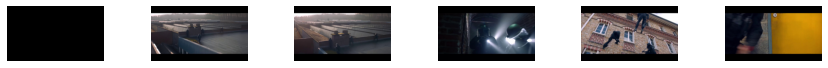

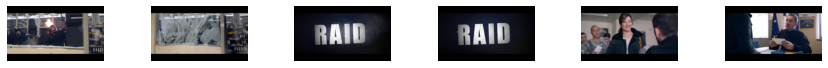

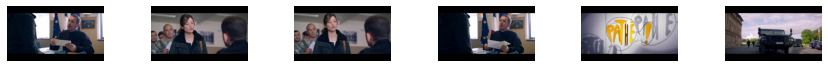

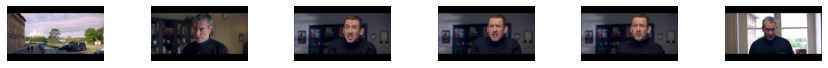

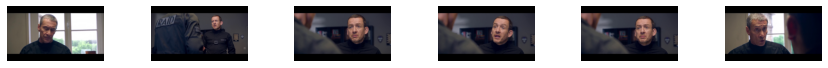

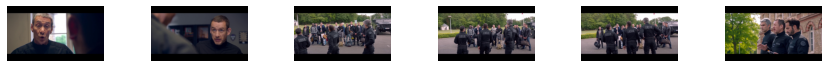

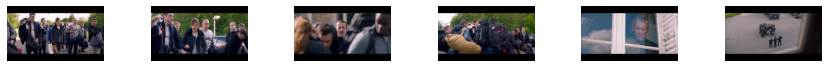

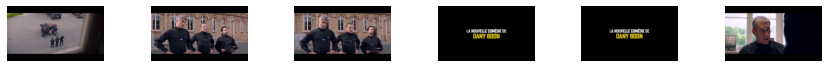

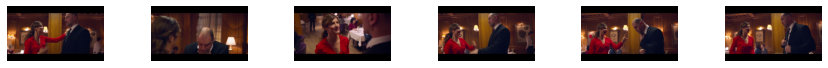

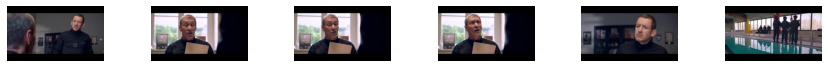

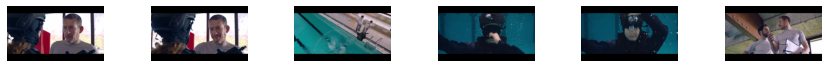

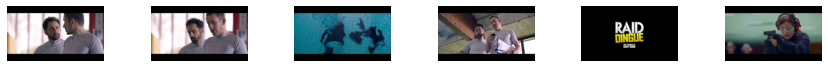

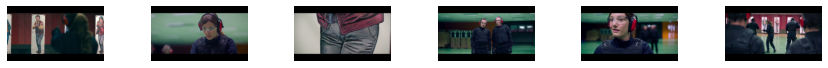

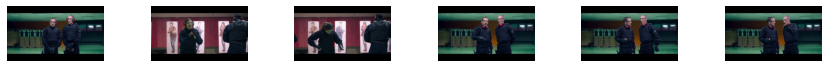

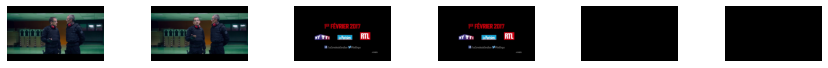

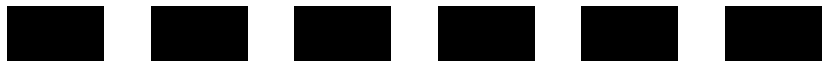

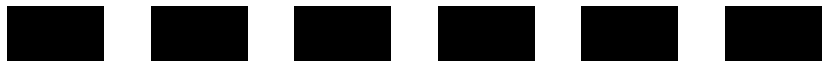

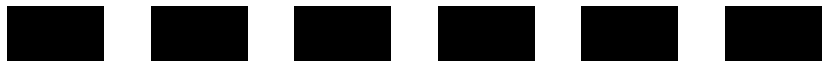

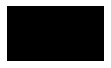

In [8]:
video.show_frames()

# Apply CLIP algorithm

In [26]:
from bechdelai.vision.clip import CLIP

In [16]:
prompts=  [
    
    # Base
    'background',
    
    # Landscapes
    'an urban area',
    'a building',
    'a nature landscape',
    
    # Dialogue
    'a woman speaking alone',
    'a man speaking alone',
    'two women speaking together',
    'two men speaking together',
    'a man and a woman speaking together',
    
    # Description
    'an old man',
    'an old woman',
    'a young man',
    'a young woman',
    
    # Scenes
    'an action scene',
    'a romantic scene',
]

In [17]:
clip = CLIP()

Loading CLIP model


In [18]:
%%time
preds,probas = clip.predict(video,prompts)

Wall time: 7.93 s


In [19]:
clip.show_preds_area(preds)

In [20]:
clip.show_preds_area(probas)

In [23]:
clip.replay(video,probas)

interactive(children=(Play(value=0, description='Press play', interval=500, max=108), Output()), _dom_classes=…

IntSlider(value=0, max=108)